In [130]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [131]:
# Load the data
data = pd.read_csv('C:/Users/rudra/Downloads/diabetes_cleandata.csv')

In [132]:
# Set seed for reproducibility
np.random.seed(42)

In [133]:
# Question a)

# set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
# find the mean Glucose and highest Glucose values of this sample and compare these statistics
# with the population statistics of the same variable. You should use charts for this comparison


In [134]:
# a) Random sample of 25 observations
sample = data.sample(n=25)
# Calculate mean and highest glucose values for both population and sample
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

# Printing the statistics
print("Population of the Mean Glucose:", population_mean_glucose)
print("Population of the Max Glucose:", population_highest_glucose)
print("\nSample Mean of Glucose:", sample_mean_glucose)
print("Sample Max of Glucose:", sample_highest_glucose)

Population of the Mean Glucose: 120.89453125
Population of the Max Glucose: 199

Sample Mean of Glucose: 116.64
Sample Max of Glucose: 183


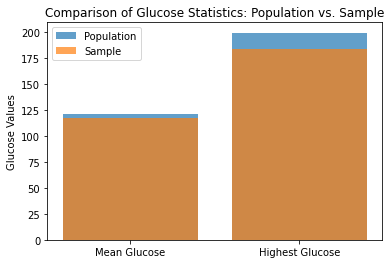

<Figure size 432x288 with 0 Axes>

In [135]:
# Create a bar chart for comparison
variables = ['Mean Glucose', 'Highest Glucose']
population_values = [population_mean_glucose, population_highest_glucose]
sample_values = [sample_mean_glucose, sample_highest_glucose]

plt.bar(variables, population_values, label='Population', alpha=0.7)
plt.bar(variables, sample_values, label='Sample', alpha=0.7)

plt.title('Comparison of Glucose Statistics: Population vs. Sample')
plt.ylabel('Glucose Values')
plt.legend()
plt.show()
#Save the chart
plt.savefig('C:/Users/rudra/Downloads/MeanMaxComparison.png')

In [136]:
# Question b)

# Find the 98th percentile of BMI of your sample and the population and compare the results
# using charts.

In [137]:
# b) 98th percentile of BMI
population_98th_percentile_bmi = data['BMI'].quantile(0.98)
sample_98th_percentile_bmi = sample['BMI'].quantile(0.98)

# Print the percentiles
print("Population of the 98th Percentile BMI:", population_98th_percentile_bmi)
print("Sample of the 98th Percentile BMI:", sample_98th_percentile_bmi)

Population of the 98th Percentile BMI: 47.52599999999996
Sample of the 98th Percentile BMI: 40.248


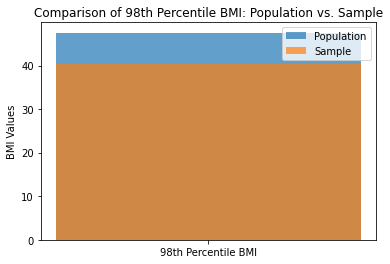

<Figure size 432x288 with 0 Axes>

In [138]:
# Create a bar chart for comparison
percentiles = ['98th Percentile BMI']
population_percentile_values = [population_98th_percentile_bmi]
sample_percentile_values = [sample_98th_percentile_bmi]

plt.bar(percentiles, population_percentile_values, label='Population', alpha=0.7)
plt.bar(percentiles, sample_percentile_values, label='Sample', alpha=0.7)

plt.title('Comparison of 98th Percentile BMI: Population vs. Sample')
plt.ylabel('BMI Values')
plt.legend()
plt.show()
plt.savefig('C:/Users/rudra/Downloads/BMI98thPercentileComparison.png')

In [139]:
# Question c)

# Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
# population and find the average mean, standard deviation and percentile for BloodPressure and
# compare this with these statistics from the population for the same variable. Again, you should
# create charts for this comparison. Report on your findings

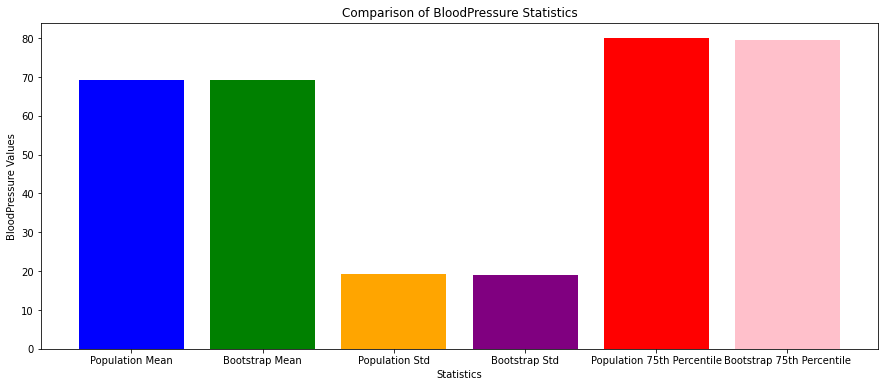

Population Mean BloodPressure: 69.10546875, Bootstrap Mean BloodPressure: 69.17696
Population Std BloodPressure: 19.355807170644777, Bootstrap Std BloodPressure: 19.08274018350705
Population 75th Percentile BloodPressure: 80.0, Bootstrap 75th Percentile BloodPressure: 79.548


In [140]:
# c) Bootstrap for BloodPressure
n_bootstrap_samples = 500
bootstrap_sample_size = 150

bootstrap_statistics = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(bootstrap_sample_size, replace=True)
    bootstrap_statistics.append({
        'Mean': bootstrap_sample.mean(),
        'Std': bootstrap_sample.std(),
        'Percentile': np.percentile(bootstrap_sample, 75)  # You can change the percentile as needed
    })

# Calculate population statistics for BloodPressure
population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_percentile_bp = np.percentile(data['BloodPressure'], 75)

colors = ['blue', 'green', 'orange', 'purple', 'red', 'pink']

# Plot comparison for BloodPressure statistics with a larger chart size
plt.figure(figsize=(15, 6))
plt.bar(['Population Mean', 'Bootstrap Mean', 'Population Std', 'Bootstrap Std', 'Population 75th Percentile', 'Bootstrap 75th Percentile'],
        [population_mean_bp, np.mean([stat['Mean'] for stat in bootstrap_statistics]), population_std_bp, np.mean([stat['Std'] for stat in bootstrap_statistics]), population_percentile_bp, np.mean([stat['Percentile'] for stat in bootstrap_statistics])],color=colors)
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.title('Comparison of BloodPressure Statistics')
plt.savefig("C:/Users/rudra/Downloads/Comparision_of_BloodPressure_Statistics.png")
plt.show()

# Report findings based on the comparisons made
print(f"Population Mean BloodPressure: {population_mean_bp}, Bootstrap Mean BloodPressure: {np.mean([stat['Mean'] for stat in bootstrap_statistics])}")
print(f"Population Std BloodPressure: {population_std_bp}, Bootstrap Std BloodPressure: {np.mean([stat['Std'] for stat in bootstrap_statistics])}")
print(f"Population 75th Percentile BloodPressure: {population_percentile_bp}, Bootstrap 75th Percentile BloodPressure: {np.mean([stat['Percentile'] for stat in bootstrap_statistics])}")

